3.**[25 points] Poisson Regression**

(a) We write Possion distribution as a function in exponential family:
\begin{align*}
p(y;\lambda) &= \frac{e^{-\lambda}\lambda^y}{y!} \\
             &= \frac{1}{y!}\exp{(y\log {\lambda} -\lambda)}
\end{align*}
Then 
$$
\left\{  
             \begin{aligned}
             T(y) = y \\
             \eta = \log{\lambda} \\
             a(\eta) = e^{\eta} \\
             b(y) = \frac{1}{y!} 
             \end{aligned}  
\right. 
$$

(b) In this problem, **canonical response function** is:
\begin{align*}
g(\eta) &= \mathbb{E}[y|x;\lambda] \\
        &= \lambda \\
        &= e^{\eta} \\
        &= e^{\theta^Tx}
\end{align*}

(c)
\begin{align*}
l(\theta) &= \log{p(y^{(i)}|x^{(i)};\theta)} \\
          &= \log{(\frac{1}{y!}\exp{(y\log {\lambda} -\lambda)})} \\
          &= -\log{y^{(i)}}+\theta^Tx^{(i)}y^{(i)}-e^{\theta^Tx^{(i)}}
\end{align*}
Then we take derivative:
\begin{align*}
\frac{\partial l(\theta)}{\partial \theta_j} &= x^{(i)}_j y^{(i)} - x^{(i)}_j e^{(\theta^Tx)}\\
                                             &= (y^{(i)} -  e^{(\theta^Tx)}) x^{(i)}_j
\end{align*}
Then 
\begin{align*}
\theta_j &:= \theta_j + \alpha  \frac{\partial l(\theta)}{\partial \theta_j} \\
         &:= \theta_j + \alpha (y^{(i)} -  e^{(\theta^Tx)}) x^{(i)}_j
\end{align*}

(d)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import src.util as util

from src.linear_model import LinearModel

First, define the class:

In [23]:
class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def h(self,theta,x):
        return np.exp(x @ theta)
    
    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        def nextstep(theta):
            return self.step_size /x.shape[0] * x.T @ (y-self.h(theta,x))

        theta = np.zeros(x.shape[1])
        tol = 1e-5
        
        # fp = np.sum(y-np.exp(theta @ x_train),1)

        step = nextstep(theta)
        count = 0
        while np.linalg.norm(step,1) > tol:
            theta += step
            step = nextstep(theta)
            count += 1
        self.theta = theta
        # for i in range(0,x.shape[0]):
            
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """
        # *** START CODE HERE ***
        return self.h(self.theta,x)
        # *** END CODE HERE ***

Define `main` function:

In [24]:
def main(lr, train_path, eval_path, pred_path):
    """Problem 3(d): Poisson regression with gradient ascent.

    Args:
        lr: Learning rate for gradient ascent.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)

    # *** START CODE HERE ***
    x_train = util.add_intercept(x_train)

    clf = PoissonRegression(step_size=lr)
    clf.fit(x_train,y_train)
    y_train_pred = clf.predict(x_train)

    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)
    x_eval = util.add_intercept(x_eval)
    y_eval_pred = clf.predict(x_eval)
    np.savetxt(pred_path, y_eval_pred)

    plt.plot(y_eval,'go',label='label')
    plt.plot(y_eval_pred,'rx',label='prediction')
    plt.legend(loc='upper left')
    plt.savefig("./output/p03d_pred.pdf")

    # Fit a Poisson Regression model
    # Run on the validation set, and use np.savetxt to save outputs to pred_path
    # *** END CODE HERE ***

Run:

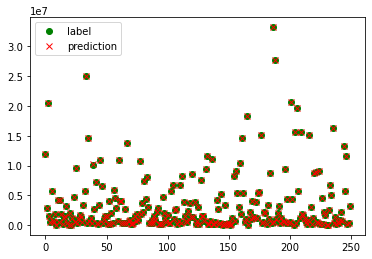

In [25]:
lr=1e-7
train_path='./data/ds4_train.csv'
eval_path='./data/ds4_valid.csv'
pred_path='./output/p03d_pred.txt'
main(lr,train_path,eval_path, pred_path)